In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as datetime

import warnings
warnings.filterwarnings('ignore')  # To ignore warnings

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def check_data_health(df):
    """
    Check the health of a DataFrame and provide a summary report.
    """
    print("=" * 50)
    print("DATA HEALTH CHECK REPORT")
    print("=" * 50)
    
    # Basic info
    print(f"\nShape: {df.shape[0]} rows, {df.shape[1]} columns")
    
    # Missing values
    print("\n--- Missing Values ---")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("✓ No missing values")
    else:
        print(missing[missing > 0])
    
    # Duplicates
    print("\n--- Duplicates ---")
    dup_count = df.duplicated().sum()
    print(f"✓ {dup_count} duplicate rows" if dup_count == 0 else f"✗ {dup_count} duplicate rows found")
    
    # Data types
    print("\n--- Data Types ---")
    print(df.dtypes)
    
    # Numeric columns statistics
    print("\n--- Numeric Columns Stats ---")
    print(df.describe())
    
    # Memory usage
    print("\n--- Memory Usage ---")
    print(f"{df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n" + "=" * 50)

# Example usage (uncomment when you have data loaded)
# check_data_health(df)

In [6]:
df = pd.read_csv('archive/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
filter_20_30 = df[(df['Age'] >= 20) & (df['Age'] <= 30)]
print("Total people in age group 20-30:", filter_20_30.shape[0])

Total people in age group 20-30: 245


In [12]:
median_age_by_embarked = df.groupby('Embarked')['Age'].median()
print(median_age_by_embarked)

Embarked
C    29.0
Q    27.0
S    28.0
Name: Age, dtype: float64


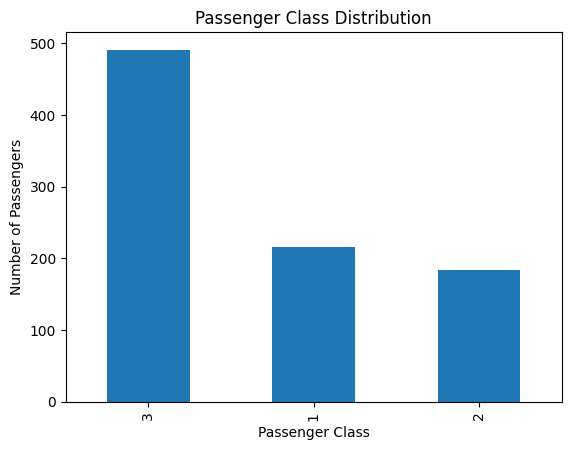

In [13]:
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()
